# Analyse Data

 This notebook is meant to analyse data from the inSilico Simulation Tool to test the datas consistency and find bugs faster.

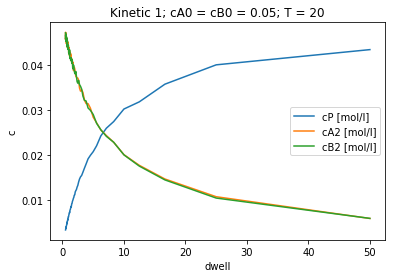

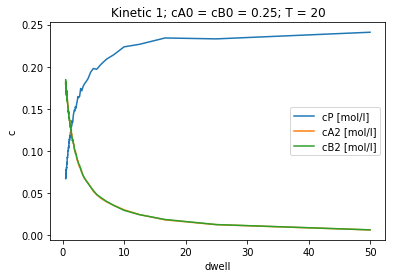

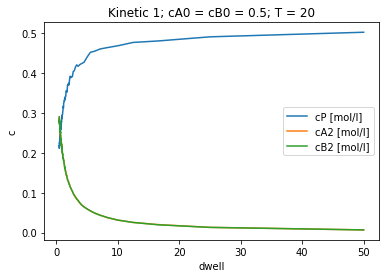

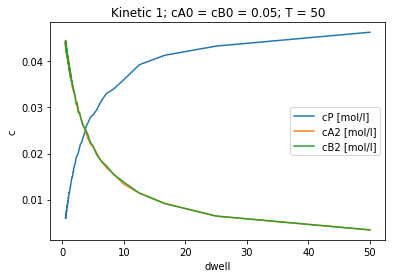

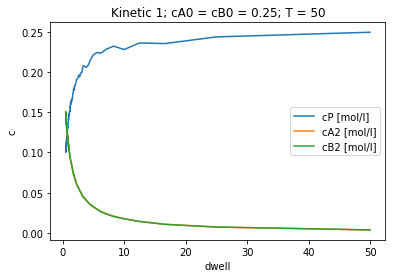

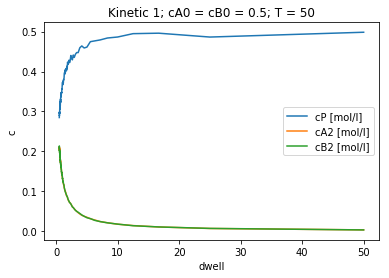

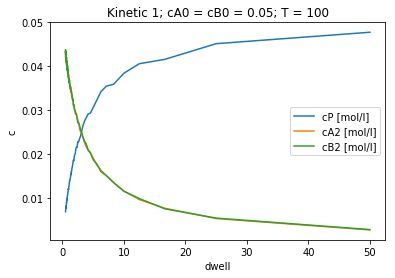

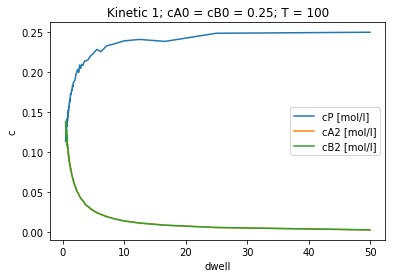

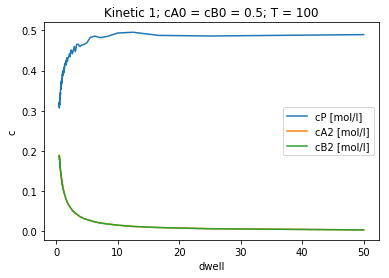

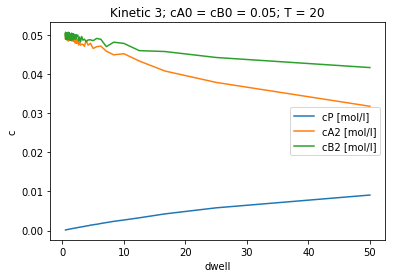

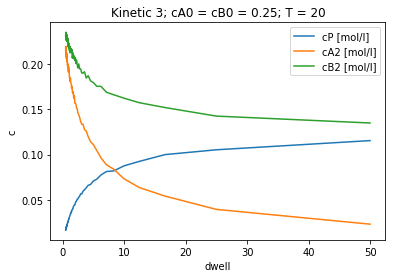

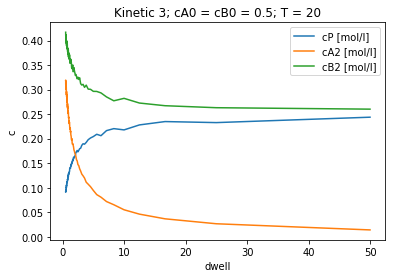

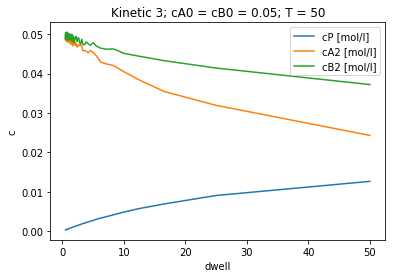

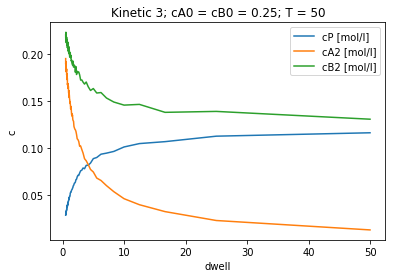

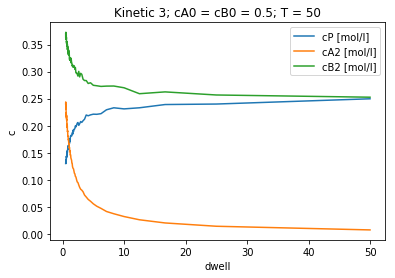

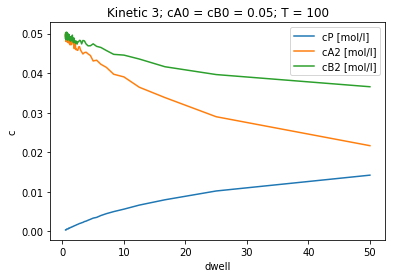

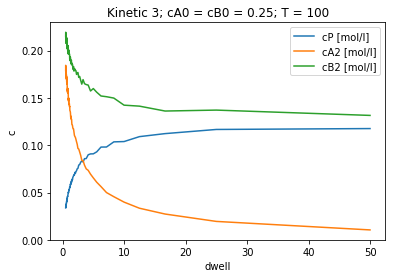

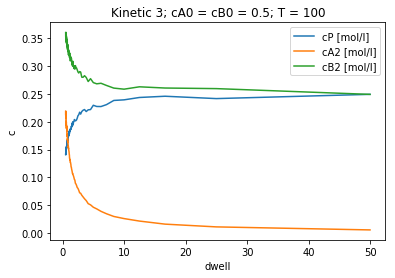

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
%matplotlib inline

# Parameter:
reactorvolume = 100 # [ml]

# import calculated Data
dfCalc = pd.read_csv("data.csv")

#import Datasets from GUI Test
df1 = pd.read_csv("datasetKinetic1.csv")
df2 = pd.read_csv("datasetKinetic2.csv")
dfGui =[df1, df2] 

# merge GUI Data
dfGui = pd.concat(dfGui)

# delete wrong sampled Gui Data (flow or concentration not matching)
dfGui = dfGui[dfGui['flow_a [ml/min]'] == dfGui['flow_b [ml/min]']]
dfGui = dfGui[dfGui['cA_0 [mol/l]'] == dfGui['cB_0 [mol/l]']]

# merge and index Gui & calculated Data
dfs =[dfCalc, dfGui]
df = pd.concat(dfs, keys=['calc', 'gui'])

# calculate values after mixing
df['flow'] = df['flow_a [ml/min]'] + df['flow_b [ml/min]']
df['cA1'] = (df['cA_0 [mol/l]'] * df['flow_a [ml/min]']) / df['flow']
df['cB1'] = (df['cB_0 [mol/l]'] * df['flow_b [ml/min]']) / df['flow']
df['dwell'] = reactorvolume / df['flow']


for kinetic in [1, 3]:
    for T in [20, 50, 100]:
        for c0 in [0.1, 0.5, 1]:
            # slice data
            temp = df[df['kinetic'] ==  kinetic]
            temp = temp[temp['T [°C]'] ==  T]
            temp = temp[temp['cA_0 [mol/l]'] == c0]
            temp = temp[temp['cB_0 [mol/l]'] == c0]
            df = df.sort_values('dwell',ascending=False)
            
            #plot data
            temp.loc['calc'].plot(x = 'dwell', y = ['cP [mol/l]','cA2 [mol/l]','cB2 [mol/l]'])
            try:
                #temp.loc['gui'].plot(x = 'dwell', y = ['cP [mol/l]','cA2 [mol/l]','cB2 [mol/l]'])
                plt.xlabel('dwell')
                plt.ylabel('c')
                plt.xlabel('dwell')
                plt.title("Kinetic " +str(kinetic) +"; cA0 = cB0 = " + str(c0/2) + "; T = "+ str(T))
            except:
                print("No Values for "+str(c0)+str(T)+str(kinetic))

In [106]:
len(temp.index)

101

In [103]:
temp.loc['gui']

kinetic  flow_a [ml/min]  flow_b [ml/min]  T [°C]  cA_0 [mol/l]  \
579        3               99               99     100           1.0   

     cB_0 [mol/l]  cP [mol/l]  cA2 [mol/l]  cB2 [mol/l]  flow  cA1  cB1  \
579           1.0    0.308605     0.186018      0.19016   198  0.5  0.5   

        dwell  
579  0.505051

In [97]:
df.loc['gui']

kinetic  flow_a [ml/min]  flow_b [ml/min]  T [°C]  cA_0 [mol/l]  \
0          1                0                0      20           0.1   
100        3                0                0      20           0.5   
100        1                0                0      20           0.5   
200        3                0                0      20           1.0   
0          3                0                0      20           0.1   
595        1                1                1     100           0.1   
300        1                1                1      50           0.1   
498        3                1                1      50           1.0   
301        3                1                1      50           0.1   
401        3                1                1      50           0.5   
690        1                1                1     100           0.5   
580        3                1                1     100           0.1   
101        1                1                1      20           0.5   
1          1                1                1      20           0.1   
788        1                1                1     100           1.0   
201        3                1                1      20           1.0   
200        1                1                1      20           1.0   
400        1                1                1      50           0.5   
101        3                1                1      20           0.5   
680        3                1                1     100           0.5   
1          3                1                1      20           0.1   
202        3                2                2      20           1.0   
302        3                2                2      50           0.1   
2          1                2                2      20           0.1   
102        3                2                2      20           0.5   
681        3                2                2     100           0.5   
402        3                2                2      50           0.5   
790        1                2                2     100           1.0   
2          3                2                2      20           0.1   
596        1                2                2     100           0.1   
..       ...              ...              ...     ...           ...   
396        1               97               97      50           0.1   
494        3               97               97      50           0.5   
755        3               97               97     100           0.5   
397        1               98               98      50           0.1   
98         1               98               98      20           0.1   
496        1               98               98      50           0.5   
297        1               98               98      20           1.0   
398        3               98               98      50           0.1   
298        3               98               98      20           1.0   
688        1               98               98     100           0.1   
198        3               98               98      20           0.5   
198        1               98               98      20           0.5   
98         3               98               98      20           0.1   
677        3               98               98     100           0.1   
495        3               98               98      50           0.5   
679        3               99               99     100           0.1   
678        3               99               99     100           0.1   
99         1               99               99      20           0.1   
199        3               99               99      20           0.5   
299        1               99               99      50           0.1   
298        1               99               99      20           1.0   
400        3               99               99      50           0.5   
399        3               99               99      50           0.1   
398        1               99               9

In [55]:
dfGui

kinetic  flow_a [ml/min]  flow_b [ml/min]  T [°C]  cA_0 [mol/l]  \
0          1                0                0      20           0.1   
1          1                1                1      20           0.1   
2          1                2                2      20           0.1   
3          1                3                3      20           0.1   
4          1                4                4      20           0.1   
5          1                5                5      20           0.1   
6          1                6                6      20           0.1   
7          1                7                7      20           0.1   
8          1                8                8      20           0.1   
9          1                9                9      20           0.1   
10         1               10               10      20           0.1   
11         1               11               11      20           0.1   
12         1               12               12      20           0.1   
13         1               13               13      20           0.1   
14         1               14               14      20           0.1   
15         1               15               15      20           0.1   
16         1               16               16      20           0.1   
17         1               17               17      20           0.1   
18         1               18               18      20           0.1   
19         1               19               19      20           0.1   
20         1               20               20      20           0.1   
21         1               21               21      20           0.1   
22         1               22               22      20           0.1   
23         1               23               23      20           0.1   
24         1               24               24      20           0.1   
25         1               25               25      20           0.1   
26         1               26               26      20           0.1   
27         1               27               27      20           0.1   
28         1               28               28      20           0.1   
29         1               29               29      20           0.1   
..       ...              ...              ...     ...           ...   
721        3               50               50     100           0.5   
723        3               53               53     100           0.5   
724        3               54               54     100           0.5   
726        3               57               57     100           0.5   
728        3               60               60     100           0.5   
729        3               61               61     100           0.5   
730        3               63               63     100           0.5   
732        3               66               66     100           0.5   
734        3               68               68     100           0.5   
736        3               70               70     100           0.5   
737        3               72               72     100           0.5   
739        3               74               74     100           0.5   
740        3               75               75     100           0.5   
741        3               77               77     100           0.5   
742        3               78               78     100           0.5   
743        3               80               80     100           0.5   
745        3               82               82     100           0.5   
747        3               85               85     100           0.5   
748        3               86               86     100           0.5   
749        3               88               88     100           0.5   
751        3               91               91     100           0.5   
752        3               92               92     100           0.5   
753        3               94               94     100           0.5   
755        3               97               9

In [3]:
df

kinetic  flow_a [ml/min]  flow_b [ml/min]  T [°C]  cA_0 [mol/l]  \
calc 0           1                0                0      20           0.1   
     600         1                0                0     100           0.1   
     2500        3                0                0     100           0.5   
     200         1                0                0      20           1.0   
     1600        2                0                0     100           0.5   
     2200        3                0                0      50           0.5   
     800         1                0                0     100           1.0   
     300         1                0                0      50           0.1   
gui  100         3                0                0      20           0.5   
calc 2000        3                0                0      20           1.0   
     500         1                0                0      50           1.0   
     1500        2                0                0     100           0.1   
     1900        3                0                0      20           0.5   
     2400        3                0                0     100           0.1   
     100         1                0                0      20           0.5   
gui  100         1                0                0      20           0.5   
calc 1000        2                0                0      20           0.5   
     2600        3                0                0     100           1.0   
     2100        3                0                0      50           0.1   
     1700        2                0                0     100           1.0   
     700         1                0                0     100           0.5   
     1200        2                0                0      50           0.1   
gui  0           1                0                0      20           0.1   
calc 1800        3                0                0      20           0.1   
     400         1                0                0      50           0.5   
     1300        2                0                0      50           0.5   
     900         2                0                0      20           0.1   
     1100        2                0                0      20           1.0   
     1400        2                0                0      50           1.0   
gui  200         3                0                0      20           1.0   
...            ...              ...              ...     ...           ...   
calc 999         2               99               99      20           0.1   
     2399        3               99               99      50           1.0   
     2499        3               99               99     100           0.1   
     899         1               99               99     100           1.0   
     2599        3               99               99     100           0.5   
     799         1               99               99     100           0.5   
     1599        2               99               99     100           0.1   
gui  579         3               99               99     100           1.0   
calc 2299        3               99               99      50           0.5   
gui  199         3               99               99      20           0.5   
calc 2099        3               99               99      20           1.0   
gui  299         1               99               99      50           0.1   
     298         1               99               99      20           1.0   
     400         3               99               99      50           0.5   
     399         3               99               99      50           0.1   
     398         1               99               99      50           0.1   
calc 499         1               99               99      50           0.5   
gui  99          3               99               99      20           0.1   
calc 2199        3               99               99      50           0.1   
gui  99          1               